Matplotlib is building the font cache; this may take a moment.


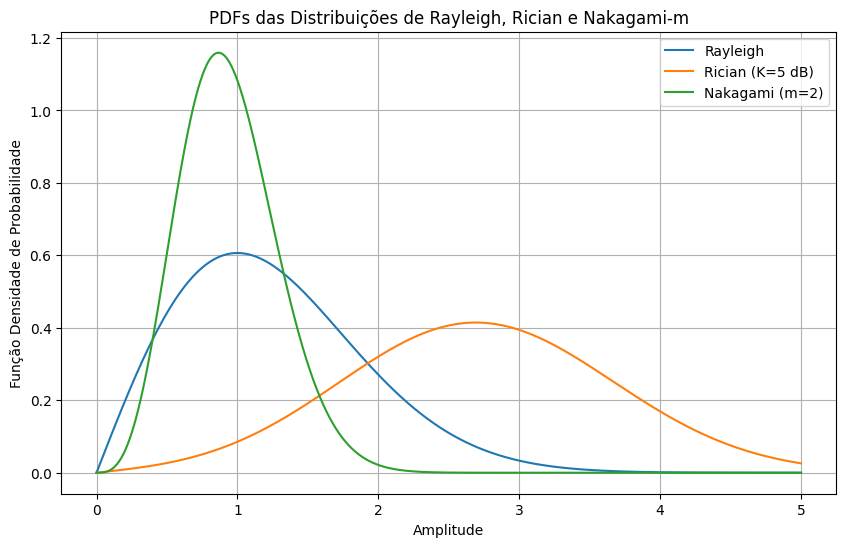

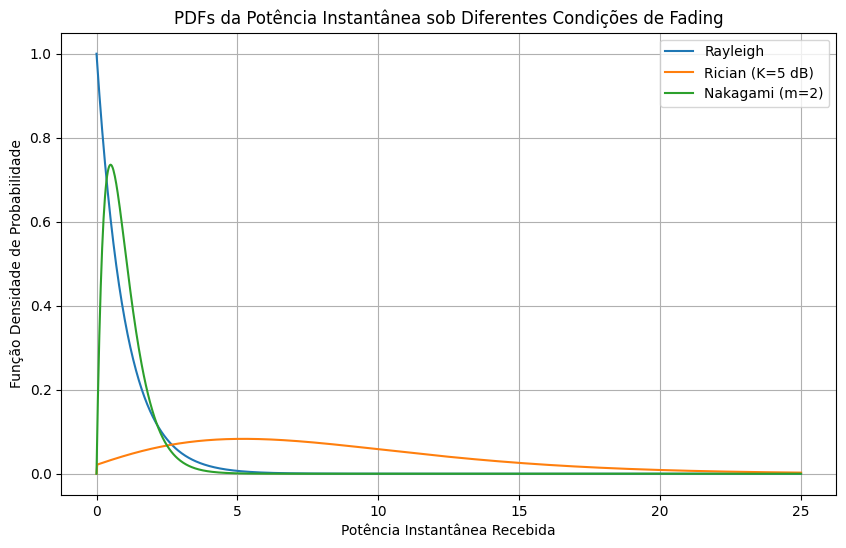

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rayleigh, rice, nakagami
from scipy.stats import expon, ncx2, gamma

# Definindo o intervalo de valores para a amplitude
x = np.linspace(0, 5, 1000)

# Distribuição Rayleigh
pdf_rayleigh = rayleigh.pdf(x)

# Distribuição Rician
K_dB = 5  # Fator K em dB
K = 10 ** (K_dB / 10)
nu = np.sqrt(2 * K)  # Parâmetro de não-centralidade
pdf_rician = rice.pdf(x, nu)

# Distribuição Nakagami-m
m = 2  # Parâmetro de forma
pdf_nakagami = nakagami.pdf(x, m)

# Plotando as PDFs das distribuições de amplitude
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_rayleigh, label="Rayleigh")
plt.plot(x, pdf_rician, label=f"Rician (K={K_dB} dB)")
plt.plot(x, pdf_nakagami, label=f"Nakagami (m={m})")
plt.xlabel("Amplitude")
plt.ylabel("Função Densidade de Probabilidade")
plt.title("PDFs das Distribuições de Rayleigh, Rician e Nakagami-m")
plt.legend()
plt.grid(True)
plt.show()

# Definindo o intervalo de valores para a potência instantânea
P = np.linspace(0, 25, 1000)

# Potência média
mean_power = 1

# Distribuição da potência instantânea para Rayleigh (Exponencial)
pdf_power_rayleigh = expon.pdf(P, scale=mean_power)

# Distribuição da potência instantânea para Rician (Qui-quadrado não central)
df = 2  # Graus de liberdade
noncentrality = nu**2
pdf_power_rician = ncx2.pdf(P, df, noncentrality)

# Distribuição da potência instantânea para Nakagami-m (Gamma)
Ω = mean_power
theta = Ω / m
pdf_power_nakagami = gamma.pdf(P, a=m, scale=theta)

# Plotando as PDFs das distribuições de potência instantânea
plt.figure(figsize=(10, 6))
plt.plot(P, pdf_power_rayleigh, label="Rayleigh")
plt.plot(P, pdf_power_rician, label=f"Rician (K={K_dB} dB)")
plt.plot(P, pdf_power_nakagami, label=f"Nakagami (m={m})")
plt.xlabel("Potência Instantânea Recebida")
plt.ylabel("Função Densidade de Probabilidade")
plt.title("PDFs da Potência Instantânea sob Diferentes Condições de Fading")
plt.legend()
plt.grid(True)
plt.show()